# 访问nextcloud中的图像文件
在这个notebook中，我们将演示如何从nextcloud服务器下载文件，如何在本地处理它们，以及如何将结果上传回服务器。

如果你在莱比锡大学工作或学习，你可以在[这里](https://www.urz.uni-leipzig.de/unsere-services/servicedetail/service/eigener-cloud-speicher-speicherwolke)注册一个这样的服务器账户。

In [1]:
from skimage.io import imread, imsave
from skimage.measure import label
import ipywidgets as widgets
import stackview

import nextcloud_client

## 登录
在本地执行下一个单元格后，你会看到三个输入字段，你可以在其中输入服务器URL、用户名和密码。

![](login.png)

In [2]:
server_widget = widgets.Text(value='https://speicherwolke.uni-leipzig.de', description='Server')
username_widget = widgets.Text(description='Username:')
password_widget = widgets.Password(description='Password')

widgets.VBox([server_widget, username_widget, password_widget])

**输入用户名和密码后不要按Shift-Enter**

In [3]:
if username_widget.value == '':
    raise RuntimeError('Enter username and password above')

In [4]:
ncc = nextcloud_client.Client(server_widget.value)
ncc.login(username_widget.value, password_widget.value)

In [5]:
# 重置密码
password_widget.value = ""

典型的错误消息是401：访问被拒绝。请检查你的用户名和密码。

## 浏览远程服务器
要查看连接是否成功，我们可以列出给定文件夹中的文件。

In [7]:
# 输入owncloud驱动器上存在的文件夹。'/'是根文件夹。
remote_folder = "/data/"

for f in ncc.list(remote_folder):
    print (f.path)

/data/blobs.tif


## 检索文件
我们可以将文件下载到本地目录。

In [8]:
# 在这里输入源文件
remote_source_file = '/data/blobs.tif'
# 输入目标位置
local_file = 'blobs.tif'

ncc.get_file(remote_path=remote_source_file, 
            local_file=local_file)

True

## 图像处理
由于我们已经下载了文件，图像处理可以照常进行。

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
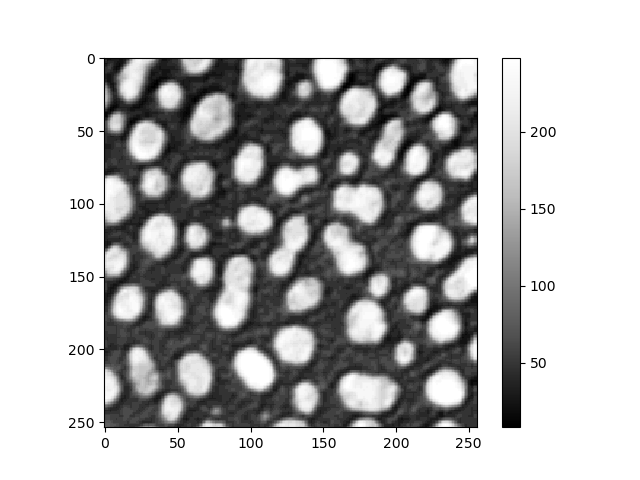
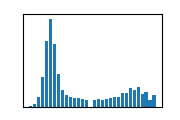

In [9]:
image = imread(local_file)
stackview.insight(image)

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
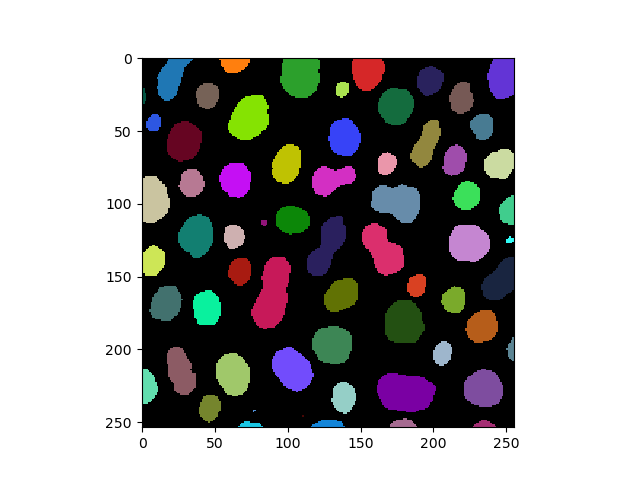

In [10]:
labels = label(image > image.max() / 2)
stackview.insight(labels)

## 上传结果
在将图像上传到云之前，我们需要将其本地保存。

In [11]:
local_file_to_upload = "blobs_labels.tif"

imsave(local_file_to_upload, labels, check_contrast=False)

我们将把文件上传到这个文件夹：

In [12]:
remote_folder

'/data/'

In [13]:
ncc.put_file(remote_folder, local_file_to_upload)

True

为了确保，我们再次打印出文件夹中的文件，检查文件是否已到达。

In [14]:
for f in ncc.list(remote_folder):
    print (f.path)

/data/blobs.tif
/data/blobs_labels.tif


## 登出
完成后，请登出！

In [15]:
ncc.logout()

True